19:15:59 - cmdstanpy - INFO - Chain [1] start processing


19:15:59 - cmdstanpy - INFO - Chain [1] done processing


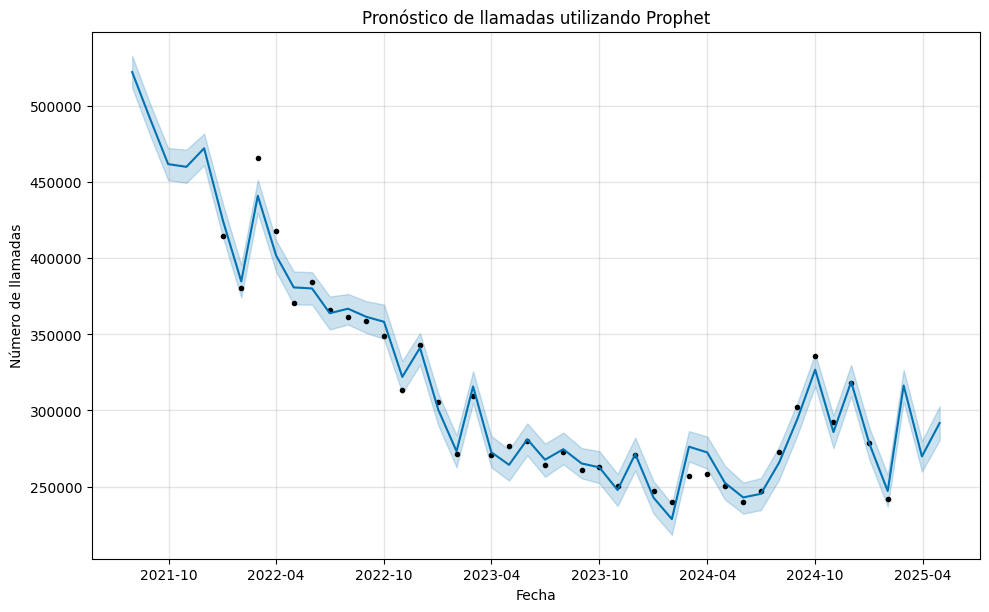

           ds           yhat     yhat_lower     yhat_upper
37 2024-09-01  294505.866467  283880.061323  305122.465860
38 2024-10-01  326740.896663  315959.915289  337271.174170
39 2024-11-01  285790.146353  275292.318851  296672.207798
40 2024-12-01  318746.141120  309374.383556  329823.505589
41 2025-01-01  278030.752678  267598.587455  288395.092985
42 2025-02-01  247055.773513  236859.857419  257720.123493
43 2025-02-28  316341.194240  305831.856311  326636.670430
44 2025-03-31  269810.039310  259825.594866  279926.803717
45 2025-04-30  291712.024594  280436.393303  302795.634218


In [19]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('../history/HISTORY.csv')
df['Fechas'] = pd.to_datetime(df['Fechas'], format='%m/%d/%Y')
df.rename(columns={'Fechas': 'ds', 'Llamadas': 'y'}, inplace=True)

# Crear y ajustar el modelo Prophet
model = Prophet()
model.fit(df)

# Crear un DataFrame para las fechas futuras (3 meses futuros)
future = model.make_future_dataframe(periods=3, freq='ME')

# Crear un DataFrame para las fechas pasadas (3 meses pasados)
past = pd.DataFrame({'ds': pd.date_range(start=df['ds'].min() - pd.DateOffset(months=6), end=df['ds'].min() - pd.DateOffset(months=1), freq='ME')})

# Combinar ambos DataFrames
combined = pd.concat([past, future], ignore_index=True)

# Realizar la predicción
forecast = model.predict(combined)

# Graficar los resultados
fig1 = model.plot(forecast)
plt.title('Pronóstico de llamadas utilizando Prophet')
plt.xlabel('Fecha')
plt.ylabel('Número de llamadas')
plt.show()

# Mostrar el pronóstico
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9))